In [15]:
# Import Dependencies
from sqlalchemy import create_engine, MetaData
import pandas as pd
from matplotlib import pyplot as plt
from key import password
import psycopg2
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Create a database connection
db_params = {
    'user': 'postgres',
    'password': password,
    'host': 'localhost',
    'port': '5432',
    'database': 'new_employees_db'
}
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

In [17]:
# Function to print tables and their data
def print_tables_and_data():
    # List table names
    cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';")
    table_names = [row[0] for row in cursor.fetchall()]
    
    for table_name in table_names:
        print(f"Table Name: {table_name}\n")

        # Fetch the first 5 rows of data from the table and print it
        cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
        columns = [desc[0] for desc in cursor.description]
        data = cursor.fetchall()
        table_data = pd.DataFrame(data, columns=columns)
        print(table_data, "\n")

# Call the function to print tables and their data
print_tables_and_data()

Table Name: titles

  title_id               title
0    s0001               Staff
1    s0002        Senior Staff
2    e0001  Assistant Engineer
3    e0002            Engineer
4    e0003     Senior Engineer 

Table Name: employees

   emp_no emp_title  birth_date  first_name  last_name sex   hire_date
0  473302     s0001  1953-07-25    Hideyuki   Zallocco   M  1990-04-28
1  475053     e0002  1954-11-18       Byong  Delgrande   F  1991-09-07
2   57444     e0002  1958-01-30       Berry       Babb   F  1992-03-21
3  421786     s0001  1957-09-28       Xiong   Verhoeff   M  1987-11-26
4  282238     e0003  1952-10-28  Abdelkader    Baumann   F  1991-01-18 

Table Name: departments

  dept_no        dept_name
0    d001        Marketing
1    d002          Finance
2    d003  Human Resources
3    d004       Production
4    d005      Development 

Table Name: department_manager

  dept_no  emp_no
0    d001  110022
1    d001  110039
2    d002  110085
3    d002  110114
4    d003  110183 

Table Name

In [18]:
# List the employee number, last name, first name, sex, and salary of each employee
query1 = '''
SELECT e.emp_no, e.last_name, e.first_name, e.sex, s.salary
FROM Employees e
JOIN Salaries s ON e.emp_no = s.emp_no;
'''
result1 = pd.read_sql(query1, conn)
result1.head()

,emp_no,last_name,first_name,sex,salary
0,57444,Babb,Berry,F,48973
1,263976,Cusworth,Eran,M,40000
2,461591,Samarati,Xudong,M,40000
3,477657,Magliocco,Lihong,M,54816
4,29920,Tyugu,Shuichi,F,40000


In [19]:
# List the first name, last name, and hire date for the employees who were hired in 1986
query2 = '''
SELECT first_name, last_name, hire_date
FROM Employees
WHERE EXTRACT(YEAR FROM hire_date) = 1986;
'''
result2 = pd.read_sql(query2, conn)
result2.head()

,first_name,last_name,hire_date
0,Eran,Cusworth,1986-11-14
1,Bojan,Zallocco,1986-10-14
2,Nevio,Demizu,1986-05-18
3,Ziva,Vecchi,1986-07-03
4,Mohit,Speek,1986-01-14


In [20]:
# List the manager of each department along with their department number, department name, employee number, last name, and first name
query3 = '''
SELECT dm.emp_no AS manager_emp_no, d.dept_no, d.dept_name, e.emp_no, e.last_name, e.first_name
FROM Department_Manager dm
JOIN Departments d ON dm.dept_no = d.dept_no
JOIN Employees e ON dm.emp_no = e.emp_no;
'''
result3 = pd.read_sql(query3, conn)
result3.head()

,manager_emp_no,dept_no,dept_name,emp_no,last_name,first_name
0,110022,d001,Marketing,110022,Markovitch,Margareta
1,110039,d001,Marketing,110039,Minakawa,Vishwani
2,110085,d002,Finance,110085,Alpin,Ebru
3,110114,d002,Finance,110114,Legleitner,Isamu
4,110183,d003,Human Resources,110183,Ossenbruggen,Shirish


In [21]:
# List the department number for each employee along with that employee’s employee number, last name, first name, and department name
query4 = '''
SELECT de.emp_no, e.last_name, e.first_name, d.dept_no, d.dept_name
FROM Department_Employee de
JOIN Employees e ON de.emp_no = e.emp_no
JOIN Departments d ON de.dept_no = d.dept_no;
'''
result4 = pd.read_sql(query4, conn)
result4.head()

,emp_no,last_name,first_name,dept_no,dept_name
0,10001,Facello,Georgi,d005,Development
1,10005,Maliniak,Kyoichi,d003,Human Resources
2,10010,Piveteau,Duangkaew,d004,Production
3,10010,Piveteau,Duangkaew,d006,Quality Management
4,10011,Sluis,Mary,d009,Customer Service


In [26]:
query5 = '''
SELECT first_name, last_name, sex
FROM employees
WHERE first_name = 'Hercules' AND last_name LIKE 'B%';
'''
cursor.execute(query5)
result = pd.DataFrame(cursor.fetchall(), columns=['first_name', 'last_name', 'sex'])
result.head()


,first_name,last_name,sex
0,Hercules,Baer,M
1,Hercules,Biron,F
2,Hercules,Birge,F
3,Hercules,Berstel,F
4,Hercules,Bernatsky,M


In [27]:
# List each employee in the Sales department, including their employee number, last name, and first name
query6 = '''
SELECT e.emp_no, e.last_name, e.first_name
FROM Employees e
JOIN Department_Employee de ON e.emp_no = de.emp_no
JOIN Departments d ON de.dept_no = d.dept_no
WHERE d.dept_name = 'Sales';
'''
result6 = pd.read_sql(query6, conn)
result6.head()

,emp_no,last_name,first_name
0,10002,Simmel,Bezalel
1,10016,Cappelletti,Kazuhito
2,10034,Swan,Bader
3,10041,Lenart,Uri
4,10050,Dredge,Yinghua


In [28]:
# List each employee in the Sales and Development departments, including their employee number, last name, first name, and department name
query7 = '''
SELECT e.emp_no, e.last_name, e.first_name, d.dept_name
FROM Employees e
JOIN Department_Employee de ON e.emp_no = de.emp_no
JOIN Departments d ON de.dept_no = d.dept_no
WHERE d.dept_name IN ('Sales', 'Development');
'''
result7 = pd.read_sql(query7, conn)
result7.head()

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,Development
1,10002,Simmel,Bezalel,Sales
2,10006,Preusig,Anneke,Development
3,10008,Kalloufi,Saniya,Development
4,10012,Bridgland,Patricio,Development


In [29]:
# List the frequency counts, in descending order, of all the employee last names (that is, how many employees share each last name)
query8 = '''
SELECT last_name, COUNT(*) AS name_count
FROM Employees
GROUP BY last_name
ORDER BY name_count DESC;
'''
result8 = pd.read_sql(query8, conn)
result8.head()

,last_name,name_count
0,Baba,226
1,Coorg,223
2,Gelosh,223
3,Sudbeck,222
4,Farris,222


# Data Visualisation and Analysis

## Percentage of employees per department

      Department Name  Employee Count
0    Customer Service           23580
1         Development           85707
2             Finance           17346
3     Human Resources           17786
4           Marketing           20211
5          Production           73485
6  Quality Management           20117
7            Research           21126
8               Sales           52245


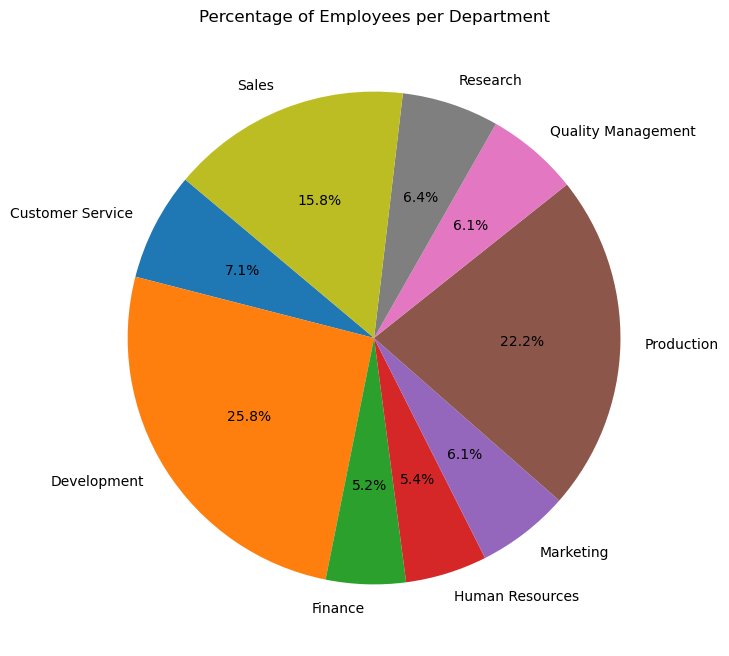

In [40]:
# Query to get the count of employees per department
cursor.execute("""
    SELECT d.dept_name, COUNT(de.emp_no) as emp_count
    FROM department_employee de
    JOIN departments d ON de.dept_no = d.dept_no
    GROUP BY d.dept_name;
""")
data = cursor.fetchall()
df1 = pd.DataFrame(data, columns=["Department Name", "Employee Count"])
print(df1)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df1["Employee Count"], labels=df1["Department Name"], autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Employees per Department")
plt.show()

The pie chart illustrates the distribution of employees across various departments within the organization. Notably, the "Development" department stands out as the largest, representing 25.8% of the workforce. "Production" and "Sales" follow closely, at 22.2% and 15.8%, respectively. Meanwhile, several smaller departments, such as "Customer Service," "Research," and "Marketing," comprise smaller percentages

## Salary ranges for all employees

        Salary
0        60117
1        65828
2        40006
3        40054
4        78228
...        ...
300019   40000
300020   58058
300021   49597
300022   40000
300023   63707

[300024 rows x 1 columns]


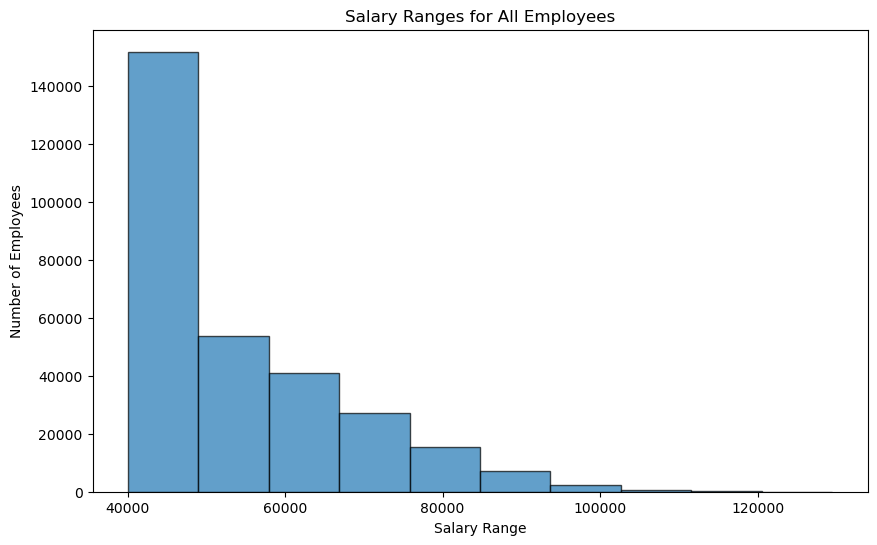

In [41]:
cursor.execute("""
    SELECT salary
    FROM salaries;
""")
data = cursor.fetchall()
df2 = pd.DataFrame(data, columns=["Salary"])
print(df2)

# Create a histogram for salary ranges
plt.figure(figsize=(10, 6))
plt.hist(df2["Salary"], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Salary Range")
plt.ylabel("Number of Employees")
plt.title("Salary Ranges for All Employees")
plt.show()

According to the histogram, the number of employees earning between 40,000 and 60,000 is the highest, followed by the number of employees earning between 60,000 and 80,000. The distribution of salary is positively skewed with the longest tail towards the right.

This means that there are more employees in the lower salary ranges with a gradual decrease in the number of employees as the salary increases. There are few outliers in the higher salary ranges.

## Average salary per job title

            Job Title      Average Salary
0  Assistant Engineer  48564.434447300771
1            Engineer  48535.336511426337
2             Manager  51531.041666666667
3     Senior Engineer  48506.799871095788
4        Senior Staff  58550.172704359929
5               Staff  58465.382850331521
6    Technique Leader  48582.896091893319


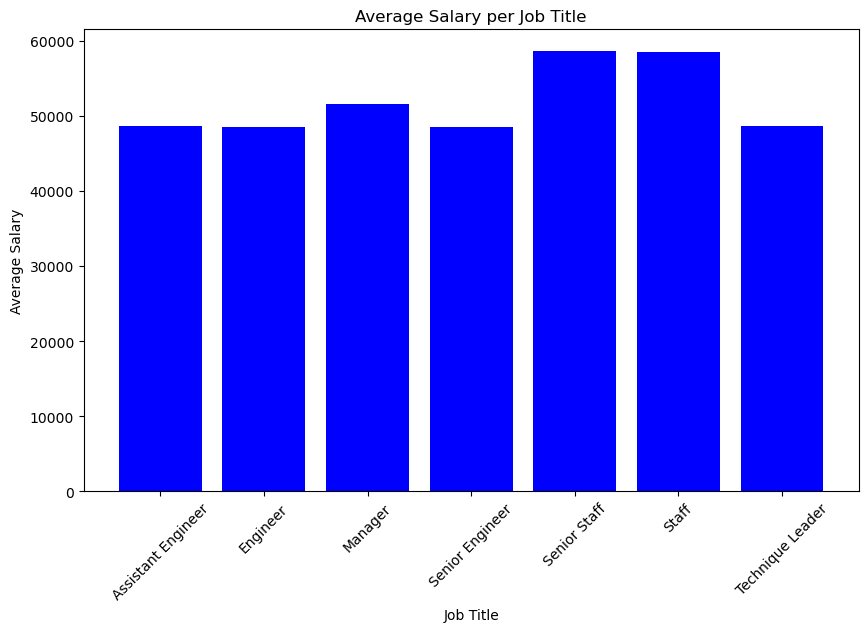

In [42]:
# Query to get the average salary per job title
cursor.execute("""
    SELECT t.title, AVG(s.salary) as avg_salary
    FROM employees e
    JOIN salaries s ON e.emp_no = s.emp_no
    JOIN titles t ON e.emp_title = t.title_id
    GROUP BY t.title;
""")
data = cursor.fetchall()
df3 = pd.DataFrame(data, columns=["Job Title", "Average Salary"])
print(df3)

# Create a bar chart for average salary per job title
plt.figure(figsize=(10, 6))
plt.bar(df3["Job Title"], df3["Average Salary"], color='blue')
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Job Title")
plt.xticks(rotation=45)
plt.show()

The data displays the average salaries for various job titles, ranging between 48,000 and 58,000. It's interesting to see that technical roles like "Assistant Engineer," "Engineer," "Senior Engineer," and "Technique Leader" all have nearly identical average salaries, around 48,000, indicating comparable pay. On the other hand, "Senior Staff" and "Staff" earn more on average, surpassing 58,000, which could be due to their seniority or added responsibilities in these positions.

## The length of employment (tenure) for employees

        Employee Number  Tenure (Years)
0                473302            33.0
1                475053            32.0
2                 57444            31.0
3                421786            36.0
4                282238            32.0
...                 ...             ...
300019           464231            35.0
300020           255832            28.0
300021            76671            35.0
300022           264920            29.0
300023           464503            36.0

[300024 rows x 2 columns]


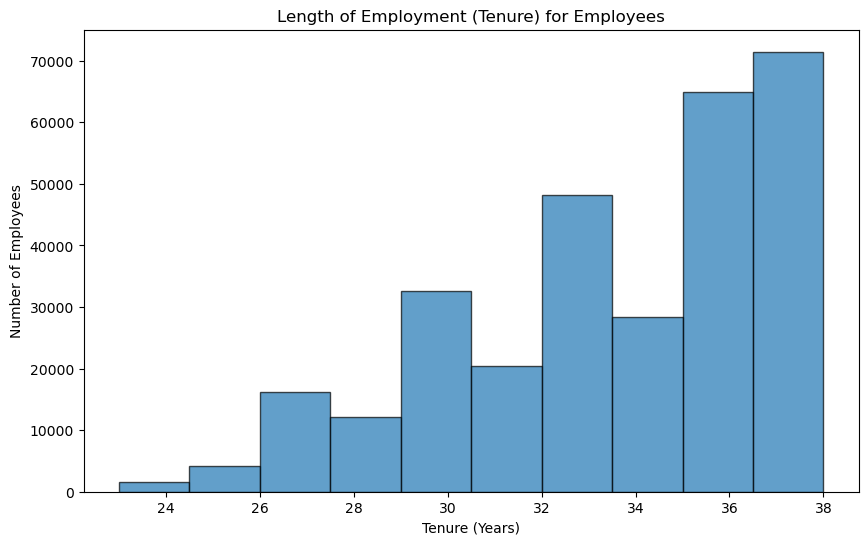

In [43]:
# Query to calculate the length of employment (tenure) for employees
cursor.execute("""
    SELECT emp_no, DATE_PART('year', NOW()) - DATE_PART('year', hire_date) as tenure
    FROM employees;
""")
data = cursor.fetchall()
df4 = pd.DataFrame(data, columns=["Employee Number", "Tenure (Years)"])
print(df4)

# Create a histogram for tenure
plt.figure(figsize=(10, 6))
plt.hist(df4["Tenure (Years)"], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Tenure (Years)")
plt.ylabel("Number of Employees")
plt.title("Length of Employment (Tenure) for Employees")
plt.show()

The histogram shows that there is a significant number of employees with tenure between 36 and 38 years. This could be due to a number of factors, such as the company's history, culture, and benefits package. 